# Oasis Infobyte Internship

# Sales Prediction
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\bhagy\Desktop\sales prediction.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=df.drop(["Unnamed: 0"],axis=1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

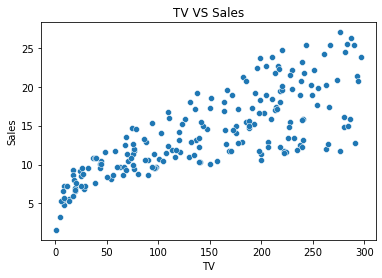

In [11]:
sns.scatterplot(x="TV",y="Sales",data=df)
plt.title("TV VS Sales")
plt.show()

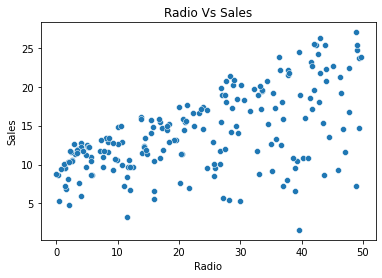

In [12]:
sns.scatterplot(x="Radio",y="Sales",data=df)
plt.title("Radio Vs Sales")
plt.show()

<Axes: xlabel='Newspaper', ylabel='Sales'>

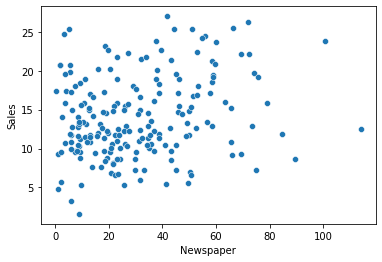

In [13]:
sns.scatterplot(x="Newspaper",y="Sales",data=df)

<Axes: xlabel='Sales', ylabel='Count'>

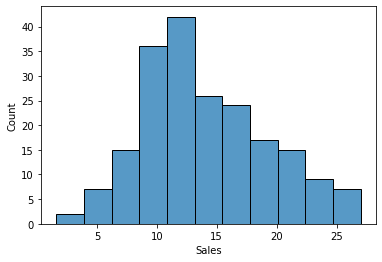

In [23]:
sns.histplot(x="Sales",data=df)

In [24]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Model Training

In [25]:
x=df.drop("Sales",axis=1)
y=["Sales"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [51]:
x_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [53]:
x_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


# LinearRegression

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred=lr.predict(x_test)

In [57]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [58]:
y_pred[0:5]

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988])

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.5116692224549084
Mean Squared Error: 3.79679723671522
Root Mean Squared Error: 1.9485372043446387
R-squared: 0.8609466508230368


# DecisionTreeRegressor

In [66]:
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
y_pred=dr.predict(x_test)

In [69]:
y_pred[0:5]

array([19.2, 23.8, 18.9,  5.3, 23.8])

In [70]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.9683333333333336
Mean Squared Error: 1.6115000000000015
Root Mean Squared Error: 1.2694486992391625
R-squared: 0.9409806586372935


# KNeighborsRegressor

In [84]:
knn_regressor=KNeighborsRegressor(n_neighbors=3)


knn_regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [85]:
y_pred=knn_regressor.predict(x_test)

In [86]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [87]:
y_pred[0:5]

array([17.33333333, 21.33333333, 25.63333333,  7.03333333, 19.46666667])

In [88]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.2194444444444446
Mean Squared Error: 2.5578703703703707
Root Mean Squared Error: 1.599334352276087
R-squared: 0.9063209279860742


# Support Vector

In [89]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)

In [90]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.5524121099375257
Mean Squared Error: 4.3660089143418785
Root Mean Squared Error: 2.0894996803880774
R-squared: 0.8400999252198803


# RandomForestRegressor

In [91]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test)